<a href="https://colab.research.google.com/github/Frandiiile/Calcul-emprunt/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation to determine NPV for a certaing Highway Project in Morocco.

In [53]:
!pip install numpy_financial

In [54]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy_financial as npf
import scipy.optimize as opt

## Les initialisations ne sont pas aléatoires on s'est basés sur les données disponibles sur les projet d'autoroute au Maroc.

In [55]:
# Initialisations
nombre_simulations = 1000
investissement_initial = 2580000000 # Montant initial investi
annees = 50 # Durée du projet
taux_actualisation = 0.04  # Taux d'actualisation
moyenne_tarification = 31  # Tarification moyenne

# Création d'une distribution de tarifications autour de la moyenne
ecart_type_tarification = 3.055
tarifications = np.random.normal(moyenne_tarification, ecart_type_tarification, nombre_simulations)
# Variation de tarification entre -15% et +15%
pourcentage_variation = np.random.uniform(-0.15, 0.15, nombre_simulations)
tarifications_variation = tarifications * (1 + pourcentage_variation)

# Simulation de nombre d'utilisateurs , processus de poisson

In [56]:
def calcul_van(tarification):
    NB=np.random.poisson(lam=5500000,size=annees)
    van = -investissement_initial
    for an in range(1, annees+1):
        van += NB[an-1] * tarification / ((1 + taux_actualisation) ** an)
    return van

# Simulation Monte Carlo de la valeur de la VAN (Net Present Value)

In [57]:
def simulation(tarification):
  tarifications=[]
  for i in range(nombre_simulations):
    u=np.random.uniform(0,1)
    if u>0.2:
      pourcentage_variation = np.random.uniform(0, 0.15)
      tarifications.append(moyenne_tarification*(1+pourcentage_variation))
    else:
      pourcentage_variation = np.random.uniform(0, 0.15)
      tarifications.append(moyenne_tarification*(1-pourcentage_variation))

    vans = [calcul_van(tarif) for tarif in tarifications_variation]
    return vans
vans=simulation(31)
# Variation du VAN par rapport à la tarification moyenne
variation_van = [van - calcul_van(moyenne_tarification) for van in vans]

# Affichage des résultats
print("VAN moyen:", np.mean(vans))
print("Variation du VAN moyen:", np.mean(variation_van))

VAN moyen: 1105937956.043128
Variation du VAN moyen: 23223761.92170201


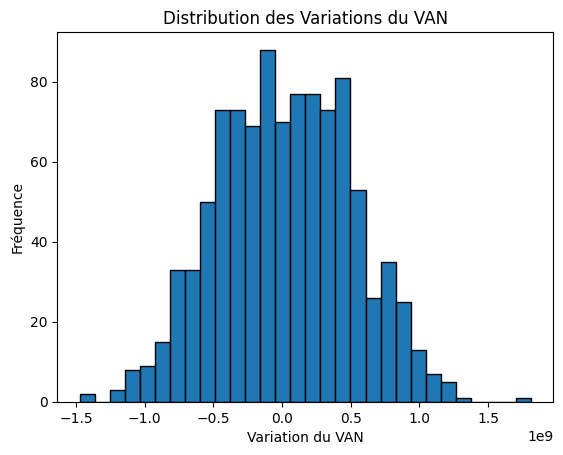

In [58]:
# Plot de la distribution des variations du VAN
plt.hist(variation_van, bins=30, edgecolor='black')
plt.xlabel('Variation du VAN')
plt.ylabel('Fréquence')
plt.title('Distribution des Variations du VAN')
plt.show()

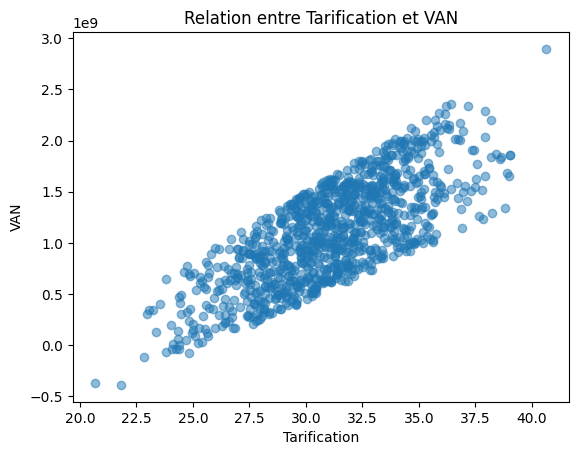

In [59]:
plt.scatter(tarifications, vans, alpha=0.5)
plt.xlabel('Tarification')
plt.ylabel('VAN')
plt.title('Relation entre Tarification et VAN')
plt.show()

# Optimisation pour choix de nombre d'utilisateurs

In [68]:
# Fonction objectif pour l'optimisation
def objectif(x):
    return -np.mean(simulation(x))/10000000 # Négatif car on veut maximiser

# Contraintes
contraintes = ({'type': 'ineq', 'fun': lambda x: investissement_initial - x * np.random.uniform(5000000,6000000)},{'type': 'ineq', 'fun': lambda x:  x},{'type': 'ineq', 'fun': lambda x:  -x+100})

# Valeurs initiales
x0 = 35 # Valeurs initiales pour tarification et nombre d'utilisateurs

# Exécution de l'optimisation
result = opt.minimize(objectif, x0, constraints=contraintes)

# Affichage des résultats
tarification_optimale = np.round(result.x,15)
print("Tarification optimale:", tarification_optimale)
print("VAN optimal:", -result.fun*10000000)  # Convertir en positif

Tarification optimale: [34.96638374]
VAN optimal: 1105945488.4477978
